**Imersão em dados com IA**

Abaixo estão os primeiros passos integrando python com ChatGPT.

Na 4° aula foi utilizado o uso de bibliotecas em python na exploração, limpeza e breve apresentação (gráficos) do dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
#Carregue o arquivo CSV em um DataFrame
dados = pd.read_csv('/content/Dados_Imersão.csv')
avaliacaos = pd.read_csv('/content/Avaliacoes.csv')

In [10]:
#Visualização das primeiras linhas do DataFrame
dados.head(2)

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...


In [11]:
# Informações gerais sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1465 non-null   object
 1   product_name   1465 non-null   object
 2   category       1465 non-null   object
 3   actual_price   1465 non-null   object
 4   product_price  1465 non-null   object
 5   rating         1465 non-null   object
 6   rating_count   1465 non-null   int64 
 7   about_product  1465 non-null   object
 8   product_link   1465 non-null   object
dtypes: int64(1), object(8)
memory usage: 103.1+ KB


In [13]:
#Estatísticas descritivas para as colunas numéricas
dados.describe()

,rating_count
count,1.465000e+03
mean,2.166947e+04
std,9.132905e+04
min,0.000000e+00
25%,9.100000e+02
50%,4.003000e+03
75%,1.466700e+04
max,2.051952e+06


In [15]:
# Remova o símbolo da rupia indiana (₹) da coluna "actual_price"
dados['actual_price'] = dados['actual_price'].str.replace('₹', '')


In [16]:
dados['actual_price'] = dados['actual_price'].str.replace('.', '')


<ipython-input-16-37c001c2b248>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['actual_price'] = dados['actual_price'].str.replace('.', '')


In [18]:
#Python não reconhece vírgula por isso mudamos para ponto
dados['actual_price'] = dados['actual_price'].str.replace(',', '.')


In [38]:
# Converta a coluna para tipo numérico (se desejar)
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

# Resultado final
dados.head(2)

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,"4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...


In [43]:
dados['rating'] = dados['rating'].str.replace(',','')
dados['rating'] = pd.to_numeric(dados['rating'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1465 non-null   object 
 1   product_name   1465 non-null   object 
 2   category       1465 non-null   object 
 3   actual_price   1465 non-null   float64
 4   product_price  1465 non-null   float64
 5   rating         1465 non-null   int64  
 6   rating_count   1465 non-null   int64  
 7   about_product  1465 non-null   object 
 8   product_link   1465 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 103.1+ KB


In [44]:
dados.describe()

,actual_price,product_price,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3077.617693,5365.248840,216.511945,2.166947e+04
std,6860.277463,10743.796284,206.212094,9.132905e+04
min,2.500000,38.000000,0.000000,0.000000e+00
25%,314.000000,800.000000,45.000000,9.100000e+02
50%,799.000000,1645.000000,45.000000,4.003000e+03
75%,1999.000000,4199.000000,451.000000,1.466700e+04
max,77990.000000,139900.000000,452.000000,2.051952e+06


**Gráficos**

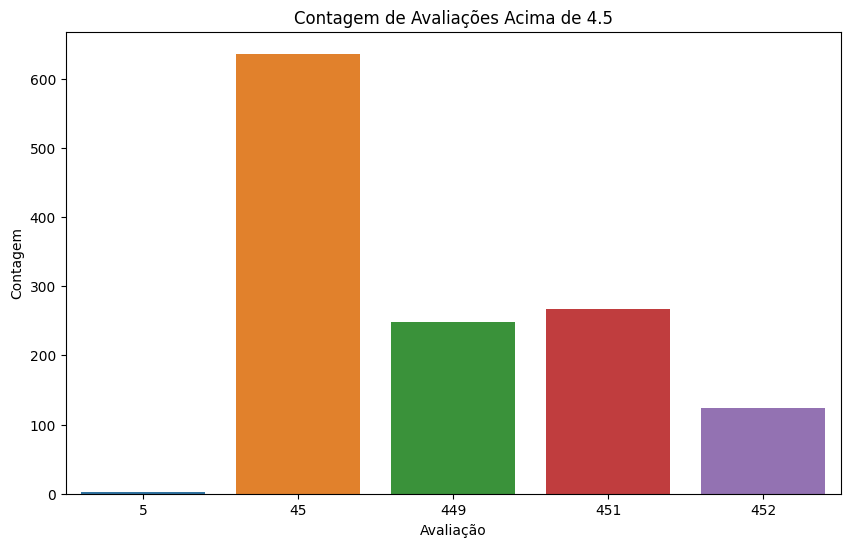

In [50]:
avaliacoes_acima_de_4_5 = dados[dados['rating'] > 4.5]
contagem_avaliacoes = avaliacoes_acima_de_4_5['rating'].value_counts().sort_index()

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_avaliacoes.index, y=contagem_avaliacoes.values)
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.title('Contagem de Avaliações Acima de 4.5')
plt.show()

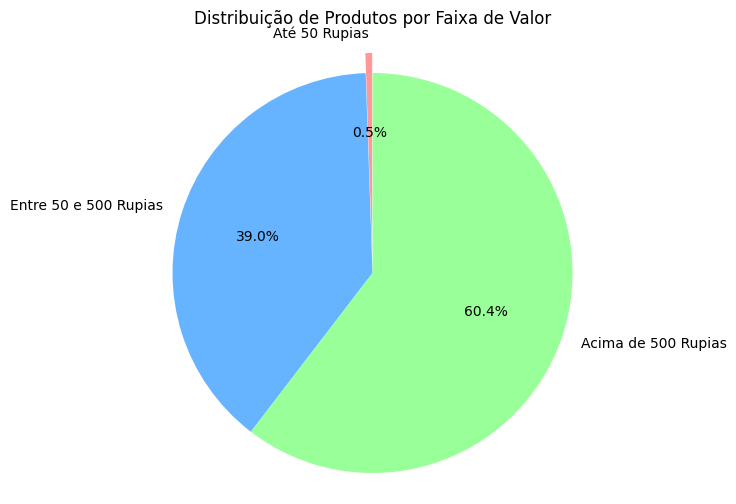

In [52]:
# Crie três filtros com base nos critérios especificados
filtro_ate_50_rupias = dados[dados['actual_price'] <= 50]
filtro_entre_50_e_500_rupias = dados[(dados['actual_price'] > 50) & (dados['actual_price'] <= 500)]
filtro_acima_de_500_rupias = dados[dados['actual_price'] > 500]

# Conte o número de produtos em cada faixa de valor
contagem_ate_50 = len(filtro_ate_50_rupias)
contagem_entre_50_e_500 = len(filtro_entre_50_e_500_rupias)
contagem_acima_de_500 = len(filtro_acima_de_500_rupias)

# Crie uma lista com as contagens
contagens = [contagem_ate_50, contagem_entre_50_e_500, contagem_acima_de_500]

# Rótulos para as fatias do gráfico
labels = ['Até 50 Rupias', 'Entre 50 e 500 Rupias', 'Acima de 500 Rupias']

# Cores para destacar a fatia com o maior valor
cores = ['#ff9999', '#66b3ff', '#99ff99']

# Exploda a fatia com o maior valor
explode = (0.1, 0, 0)

# Crie o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagens, labels=labels, autopct='%1.1f%%', colors=cores, explode=explode, startangle=90)
plt.axis('equal')  # Para garantir que o gráfico de pizza seja circular

# Adicione um título
plt.title('Distribuição de Produtos por Faixa de Valor')

# Mostra o gráfico
plt.show()
